In [1]:
# for manipulation of dataframe
import pandas as pd
# for creating data visualization
import matplotlib.pyplot as plt
# for creating distributions 
import seaborn as sns
# for interactivity
from ipywidgets import interact

# Data Loading

In [2]:
# let's load the dataset
df=pd.read_excel('crop_prediction.xlsx')

In [3]:
# let's check the first five rows of the dataset
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42,43,21,82.0,7,203,rice
1,85.0,58,41,22,80.0,7,227,rice
2,60.0,55,44,23,82.0,8,264,rice
3,74.0,35,40,26,80.0,7,243,rice
4,78.0,42,42,20,82.0,8,263,rice


In [4]:
# let's check the shape of the dataset
df.shape

(2200, 8)

In [5]:
# let's check the name of the crops
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<AxesSubplot:>

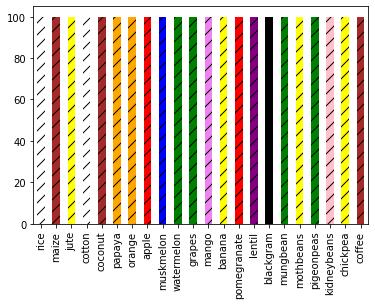

In [6]:
# let's check the count of each crops
cols=['white','brown','yellow','white','brown','orange','orange','red','blue','green','green','violet','yellow','red','purple',
      'black','green','yellow','green','pink','yellow','brown']
df['label'].value_counts().plot.bar(linewidth=1,alpha=1,fill=True,color=cols,hatch='//')

# Data Cleaning

In [7]:
# let's check if there is any missing value present in the dataset
df.isnull().sum()

N              14
P               0
K               0
temperature     0
humidity       21
ph              0
rainfall        0
label           0
dtype: int64

In [8]:
# filling the missing value for Nitrogen column with 0
df['N'].fillna(0,inplace=True)

In [9]:
# filling the missing value for Humidity column with mean value of Humidity column
df['humidity'].fillna(df['humidity'].mean(),inplace=True)

In [10]:
# let's recheck if there is still any missing value present in the dataset
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

# Exploratory Data Analysis

In [11]:
# Let's do the descriptive statistics of the dataset
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.286364,53.362727,48.149091,25.613182,71.670491,6.495000,103.458182
std,37.037324,32.985883,50.647931,5.080069,22.010161,0.786408,54.964423
min,0.000000,5.000000,5.000000,9.000000,14.000000,4.000000,20.000000
25%,21.000000,28.000000,20.000000,23.000000,60.000000,6.000000,65.000000
50%,37.000000,51.000000,32.000000,26.000000,80.000000,6.000000,95.000000
75%,84.000000,68.000000,49.000000,29.000000,90.000000,7.000000,124.000000
max,140.000000,145.000000,205.000000,44.000000,100.000000,10.000000,299.000000


In [12]:
import warnings
warnings.filterwarnings('ignore')

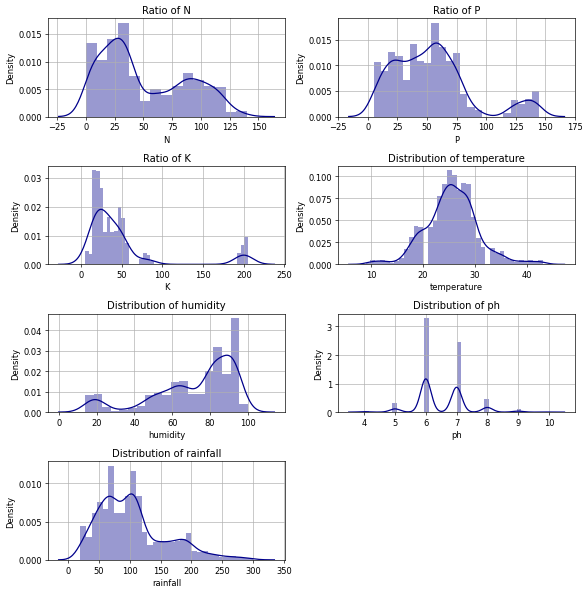

In [13]:
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 60

features = ['N','P','K','temperature','humidity','ph','rainfall']

for i, feat in enumerate(features):
    plt.subplot(4,2,i + 1)
    sns.distplot(df[feat],color='darkblue')
    if i < 3:
        plt.title(f'Ratio of {feat}',fontsize = 12)
    else:
        plt.title(f'Distribution of {feat}',fontsize = 12)
    plt.tight_layout()
    plt.grid()
    

<AxesSubplot:>

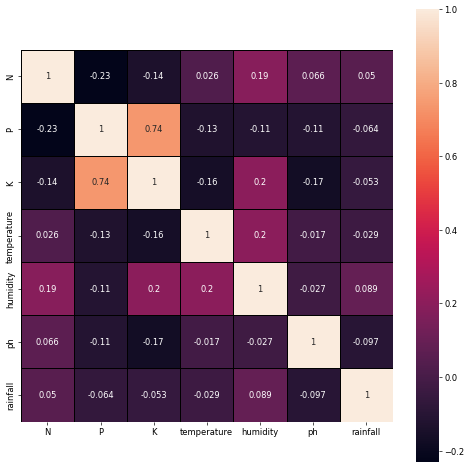

In [14]:
# Let's check the correlation between the variables
sns.heatmap(df.corr(),annot=True,cbar=True,linewidth=1,linecolor='black',square=True)

In [15]:
# let's check the Avearge requirement of all the crops

print ("Average Ratio of Nitrogen in the Soil:{0:.2f}".format(df['N'].mean()))
print ("Average Ratio of Phosphorous in the Soil:{0:.2f}".format(df['P'].mean()))
print ("Average Ratio of Potassium in the Soil:{0:.2f}".format(df['K'].mean()))
print ("Average Temperature in the Soil:{0:.2f}".format(df['temperature'].mean()))
print ("Average Relative Humidity in % in the Soil:{0:.2f}".format(df['humidity'].mean()))
print ("Average PH value of the Soil:{0:.2f}".format(df['ph'].mean()))
print ("Average Rainfall in mm:{0:.2f}".format(df['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil:50.29
Average Ratio of Phosphorous in the Soil:53.36
Average Ratio of Potassium in the Soil:48.15
Average Temperature in the Soil:25.61
Average Relative Humidity in % in the Soil:71.67
Average PH value of the Soil:6.50
Average Rainfall in mm:103.46


In [16]:
# Let's chech the Summary Statistics for each of the Crops

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is {0:.2f}".format(df[conditions].mean()))
    print("----------------------------------------------")
    print("Rice : {0:.2f}".format(df[(df['label'] == 'rice')][conditions].mean()))
    print("Maize : {0:.2f}".format(df[(df['label'] == 'maize')][conditions].mean()))
    print("Jute : {0:.2f}".format(df[(df['label'] == 'jute')][conditions].mean()))
    print("Cotton : {0:.2f}".format(df[(df['label'] == 'cotton')][conditions].mean()))
    print("Coconut : {0:.2f}".format(df[(df['label'] == 'coconut')][conditions].mean()))
    print("Papaya : {0:.2f}".format(df[(df['label'] == 'papaya')][conditions].mean()))
    print("Orange : {0:.2f}".format(df[(df['label'] == 'orange')][conditions].mean()))
    print("Apple : {0:.2f}".format(df[(df['label'] == 'apple')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(df[(df['label'] == 'muskmelon')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(df[(df['label'] == 'watermelon')][conditions].mean()))
    print("Grapes : {0:.2f}".format(df[(df['label'] == 'grapes')][conditions].mean()))
    print("Mango : {0:.2f}".format(df[(df['label'] == 'mango')][conditions].mean()))
    print("Banana : {0:.2f}".format(df[(df['label'] == 'banana')][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(df[(df['label'] == 'pomegranate')][conditions].mean()))
    print("Lentil : {0:.2f}".format(df[(df['label'] == 'lentil')][conditions].mean()))
    print("Blackgram : {0:.2f}".format(df[(df['label'] == 'blackgram')][conditions].mean()))
    print("Mungbean : {0:.2f}".format(df[(df['label'] == 'mungbean')][conditions].mean()))
    print("Mothbeans : {0:.2f}".format(df[(df['label'] == 'mothbeans')][conditions].mean()))
    print("Pigeonpeas : {0:.2f}".format(df[(df['label'] == 'pigeonpeas')][conditions].mean()))
    print("Kidneybeans : {0:.2f}".format(df[(df['label'] == 'kidneybeans')][conditions].mean()))
    print("Chickpea : {0:.2f}".format(df[(df['label'] == 'chickpea')][conditions].mean()))
    print("Coffee : {0:.2f}".format(df[(df['label'] == 'coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [17]:
# Let's chech the Summary Statistics for each of the Crops

@interact
def summary(crops = list(df['label'].value_counts().index)):
    v = df[df['label']==crops]
    print("----------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required :",v['N'].min())
    print("Average Nitrogen required :",v['N'].mean())
    print("Maximum Nitrogen required :",v['N'].max())
    print("----------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :",v['P'].min())
    print("Average Phosphorous required :",v['P'].mean())
    print("Maximum Phosphorous required :",v['P'].max())
    print("----------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :",v['N'].min())
    print("Average Potassium required :",v['N'].mean())
    print("Maximum Potassium required :",v['N'].max())
    print("----------------------------------------------")
    print("Statistics for Tempearture")
    print("Minimum Tempearture required :{0:.2f}".format(v['temperature'].min()))
    print("Average Tempearture required :{0:.2f}".format(v['temperature'].mean()))
    print("Maximum Tempearture required :.{0:.2f}".format(v['temperature'].max()))
    print("----------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required :{0:.2f}".format(v['humidity'].min()))
    print("Average Humidity required :{0:.2f}".format(v['humidity'].mean()))
    print("Maximum Humidity required :.{0:.2f}".format(v['humidity'].max()))
    print("----------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required :{0:.2f}".format(v['ph'].min()))
    print("Average PH required :{0:.2f}".format(v['ph'].mean()))
    print("Maximum PH required :.{0:.2f}".format(v['ph'].max()))
    print("----------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required :{0:.2f}".format(v['rainfall'].min()))
    print("Average Rainfall required :{0:.2f}".format(v['rainfall'].mean()))
    print("Maximum Rainfall required :.{0:.2f}".format(v['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

# Model building

In [18]:
# for conversion of categorical variable into numerical variable
from sklearn.preprocessing import LabelEncoder
# Let's convert the categorical variable(label) into numerical variable
label_encoder=LabelEncoder()
df['encoded_label']=label_encoder.fit_transform(df['label'])
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,encoded_label
0,90.0,42,43,21,82.0,7,203,rice,20
1,85.0,58,41,22,80.0,7,227,rice,20
2,60.0,55,44,23,82.0,8,264,rice,20
3,74.0,35,40,26,80.0,7,243,rice,20
4,78.0,42,42,20,82.0,8,263,rice,20


In [19]:
# Let's check the number assigned to our crops
df[(df.encoded_label=='rice')].head()

,N,P,K,temperature,humidity,ph,rainfall,label,encoded_label


rice=20,
maize=11,
jute=8,
cotton=6,
coconut=4,
papaya=17,
orange=16,
apple=0,
muskmelon=15,
watermelon=21,
grapes=7
mango=12,
banana=1,
pomegranate=19,
lentil=10,
blackgram=2,
mungbeans=14,
mothbeans=13,
pigeonpeas=18,
kidneybeans=9,
chickpea=3,
coffee=5

In [20]:
# Let's drop the categorical column(label)
df.drop('label',axis=1,inplace=True)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,encoded_label
0,90.0,42,43,21,82.0,7,203,20
1,85.0,58,41,22,80.0,7,227,20
2,60.0,55,44,23,82.0,8,264,20
3,74.0,35,40,26,80.0,7,243,20
4,78.0,42,42,20,82.0,8,263,20


In [21]:
# Let's define the features and target variable
x=df[['N','P','K','temperature','humidity','ph','rainfall']]
y=df[['encoded_label']]

In [22]:
# Let's split our dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
# Let's check the length of our Training dataset
len(X_train)

1760

In [24]:
# Let's check the length of our Testing dataset
len(X_test)

440

In [25]:
# Importing Random Forest algorithm from sklearn
from sklearn.ensemble import RandomForestClassifier
# Let's train our model
model=RandomForestClassifier(n_estimators=15)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=15)

In [26]:
# Predicting the model with testing dataset(X_test)
y_predicted=model.predict(X_test)
Y_predicted=pd.DataFrame(y_predicted)
Y_predicted
Y_predicted.reset_index(drop=True)

,0
0,5
1,21
2,19
3,20
4,9
...,...
435,2
436,8
437,12
438,2


In [27]:
# Actual values from which our testing phase should be compared
y_test
y_test.reset_index(drop=True)

,encoded_label
0,5
1,21
2,19
3,20
4,9
...,...
435,2
436,8
437,12
438,2


# Model Testing

In [28]:
# Let's test our model with some random values
model.predict([[50,30,40,25,70,6,100]])

array([12])

In [29]:
# Lets's calculate the score of our model
model.score(X_test,y_test)*100

99.0909090909091

Text(0.5, 1.0, 'Confusion_Matrix')

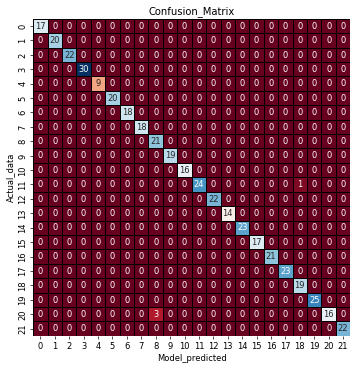

In [30]:
# for creating confusion matrix
from sklearn.metrics import confusion_matrix
# Let's check where our Model fails 
plt.figure(figsize=(7,7))
cm=confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True,cbar=False,linewidth=1,linecolor='black',cmap='RdBu',square=True)
plt.xlabel('Model_predicted')
plt.ylabel('Actual_data')
plt.title('Confusion_Matrix')

In [31]:
# for creating classification report
from sklearn.metrics import classification_report
# Let's print our classification report
cr=classification_report(y_test,y_predicted)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        18
           8       0.88      1.00      0.93        21
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        16
          11       1.00      0.96      0.98        25
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        21
          17       1.00    